In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_data(year):
    df = pd.read_excel('data/historical_data_2019_2023.xlsx', sheet_name=f'{year}')
    df = df[['Mês', 'Dia', 'Minuto', 'Data/Hora', f'UFV Centralizada SIN {year}', f'Carga SIN {year}', f'Eolica SIN {year}']]
    df.columns = ['Month', 'Day', 'Minute', 'Date', 'Solar', 'Load', 'Wind']
    df['Solar'] = abs(df['Solar'])

    df['Net Load'] = (df['Load']) - (df['Wind'] + df['Solar'])
    df['Hour'] = pd.to_datetime(df['Date']).dt.strftime('%H:%M')
    
    return df

In [3]:
df_2020 = read_data(2020)
df_2021 = read_data(2021)
df_2022 = read_data(2022)
df_2023 = read_data(2023)

In [4]:
def plot_curves(dataset_list, feature):
    colors = ['b', 'r', 'c', 'y', 'g']
    labels = ['2020', '2021', '2022', '2023']
    
    plt.figure(figsize=(12, 5))
    for i in range(0, len(dataset_list)):
        plt.plot(dataset_list[i]['Date'], dataset_list[i][f'{feature}'], alpha=0.7, color=colors[i], label=labels[i])
    
    plt.ylabel(f'{feature}')
        
    plt.legend(bbox_to_anchor=(1.12, 1.02), fontsize=11, 
                        loc='upper right', fancybox=True, shadow=True)
    plt.show()

In [5]:
data_gather = [df_2020, df_2021, df_2022, df_2023]

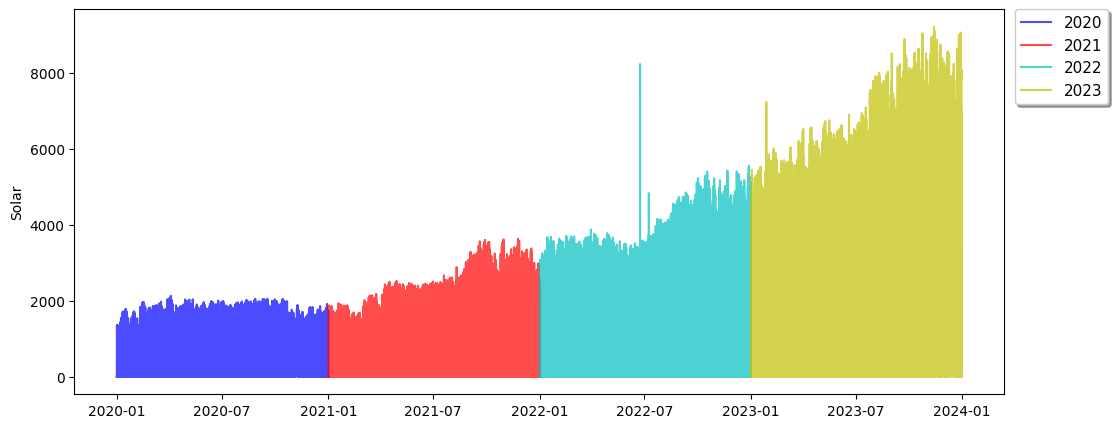

In [6]:
plot_curves(data_gather, 'Solar')

In [12]:
def plot_by_date(dataset_list, feature, month, day):
    data_plot = []
    colors = ['b', 'r', 'c', 'y', 'g']
    labels = ['2020', '2021', '2022', '2023']
    
    for i in range(0, len(dataset_list)):
        df_filt = dataset_list[i].loc[(dataset_list[i]['Month'] == month) & (dataset_list[i]['Day'] == day)] 
        data_plot.append(df_filt)
        
    plt.figure(figsize=(10, 5))
    for i in range(0, len(dataset_list)):
        plt.plot(data_plot[i]['Hour'], data_plot[i][f'{feature}'], color=colors[i], label=labels[i])
        
    plt.ylabel(f'{feature}')
    plt.title(f'{month}/{day}')
    plt.xticks(data_plot[0]['Hour'][::6], rotation=45)
    plt.legend(bbox_to_anchor=(1.14, 1.02), fontsize=11, 
                        loc='upper right', fancybox=True, shadow=True)
    plt.show()

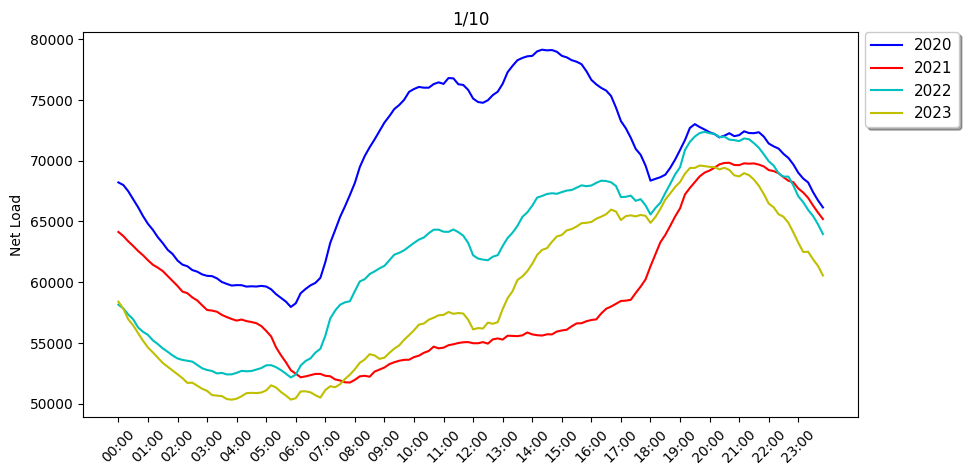

In [14]:
plot_by_date(data_gather, 'Net Load', 1, 10)